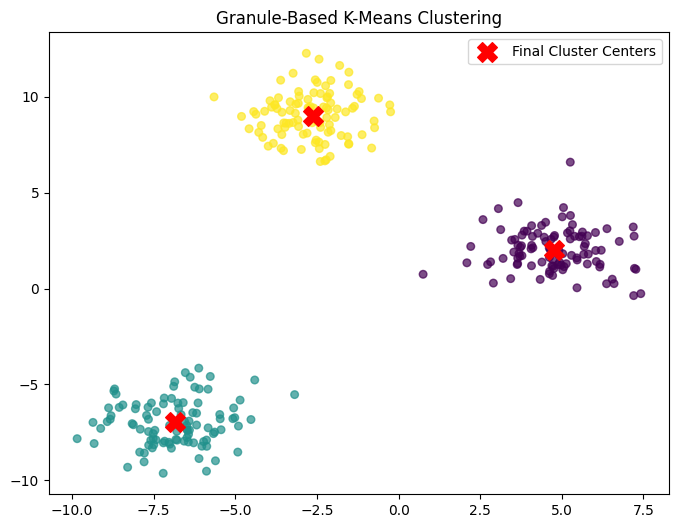

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 1: Generate synthetic data
n_samples = 300
n_features = 2
n_clusters = 3
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=1.2, random_state=42)

# Step 2: Apply granular clustering (mini clusters)
granule_size = 10  # Number of points in each granule
granule_clusters = n_samples // granule_size

granule_kmeans = KMeans(n_clusters=granule_clusters, random_state=42)
granule_labels = granule_kmeans.fit_predict(X)

# Step 3: Aggregate granules and apply final K-Means clustering
final_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
final_labels = final_kmeans.fit_predict(granule_kmeans.cluster_centers_)

# Step 4: Assign final labels to original data
final_data_labels = final_kmeans.predict(X)

# Step 5: Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_data_labels, cmap='viridis', s=30, alpha=0.7)
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label="Final Cluster Centers")
plt.title("Granule-Based K-Means Clustering")
plt.legend()
plt.show()
